# Demonstrate a working controller

## 1. Set up the notebook

Do imports.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, IFrame, HTML
from ae483tools import *

Define a function to check mocap data from a given flight.

In [2]:
def check_data(filename):
    # Load data
    raw_data_drone, raw_data_mocap = load_hardware_data(filename)

    # Compute statistics
    how_many_timesteps = len(raw_data_mocap['z'])
    how_many_dropouts = len(np.argwhere(np.isnan(raw_data_mocap['z'])).flatten())
    percent_coverage = 100. * (1. - (how_many_dropouts / how_many_timesteps))
    elapsed_time = raw_data_mocap['time'][-1] - raw_data_mocap['time'][0]
    sample_rate = how_many_timesteps / elapsed_time

    # Plot data (with relevant statistics in the title)
    fig, ax = plt.subplots(1, 1, figsize=(7, 3), tight_layout=True)
    ax.plot(raw_data_mocap['time'], raw_data_mocap['z'])
    ax.set_xlabel('t (seconds)')
    ax.set_ylabel('z (meters)')
    ax.set_ylim(0., 1.)
    ax.set_title(f'({filename}) Tracked {percent_coverage:.1f}% of {how_many_timesteps} time steps at about {sample_rate:.0f} Hz')
    ax.grid()

Define a function to embed videos that have been uploaded to [Illinois Mediaspace](https://mediaspace.illinois.edu/).

In [3]:
def mediaspace(url, width=640, height=397):
    video_id = url.rsplit('/', 1)[-1]
    src = f'https://mediaspace.illinois.edu/embed/secure/iframe/entryId/{video_id}?st=0'
    display(IFrame(src, width=width, height=height))
    display(HTML(f'<a href="{url}" target="_blank">Go to video on Illinois Mediaspace</a>'))

## 2. Check mocap coverage

Check `demonstration_data.json`.

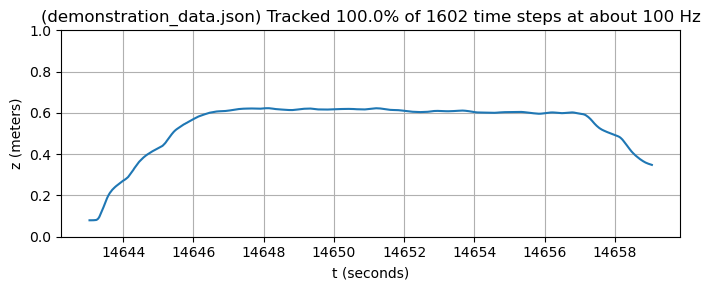

In [4]:
check_data('demonstration_data.json')

## 3. Show results

Load flight data.

In [5]:
raw_data_drone, raw_data_mocap = load_hardware_data('demonstration_data.json')

Resample and parse drone data.

In [6]:
data_drone = resample_data_drone(
    raw_data_drone,
    t_min_offset=0., # <-- FIXME
    t_max_offset=0., # <-- FIXME
)

# time
t = data_drone['time']

# position
p_x = data_drone['ae483log.p_x']
p_y = data_drone['ae483log.p_y']
p_z = data_drone['ae483log.p_z']

# desired position
p_x_des = data_drone['ae483log.p_x_des']
p_y_des = data_drone['ae483log.p_y_des']
p_z_des = data_drone['ae483log.p_z_des']

# orientation
psi = data_drone['ae483log.psi']
theta = data_drone['ae483log.theta']
phi = data_drone['ae483log.phi']

# motor power commands
m_1 = data_drone['ae483log.m_1']
m_2 = data_drone['ae483log.m_2']
m_3 = data_drone['ae483log.m_3']
m_4 = data_drone['ae483log.m_4']

Resample and parse mocap data (with an optimal time shift and with coordinate transformation).

In [7]:
data_mocap = sync_data_mocap(raw_data_mocap, t, p_z)

p_x_mocap = data_mocap['x']
p_y_mocap = data_mocap['y']
p_z_mocap = data_mocap['z']
psi_mocap = data_mocap['yaw']
theta_mocap = data_mocap['pitch']
phi_mocap = data_mocap['roll']

Plot $x, y$ data.

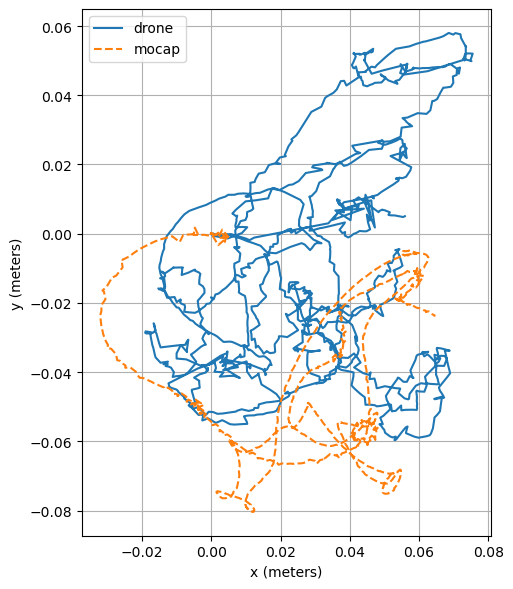

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6), tight_layout=True)
ax.plot(p_x, p_y, label='drone')
ax.plot(p_x_mocap, p_y_mocap, '--', label='mocap')
ax.set_aspect('equal')
ax.set_xlabel('x (meters)')
ax.set_ylabel('y (meters)')
ax.legend()
ax.grid()

Plot all data.

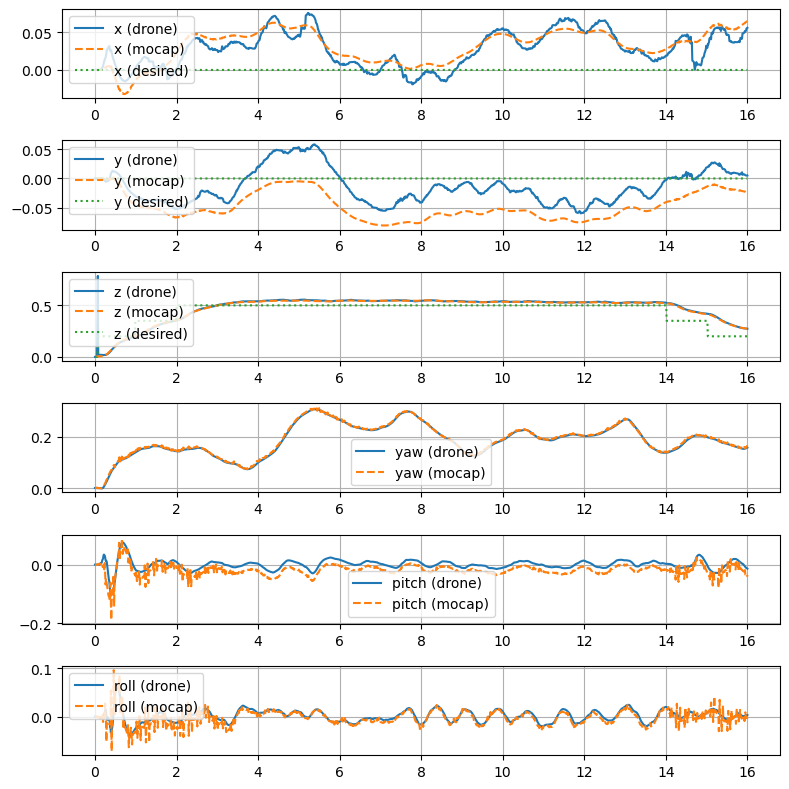

In [9]:
fig, (ax_x, ax_y, ax_z, ax_psi, ax_theta, ax_phi) = plt.subplots(6, 1, figsize=(8, 8), tight_layout=True)

ax_x.plot(t, p_x, label='x (drone)')
ax_x.plot(t, p_x_mocap, '--', label='x (mocap)')
ax_x.plot(t, p_x_des, ':', label='x (desired)')
ax_x.legend()
ax_x.grid()

ax_y.plot(t, p_y, label='y (drone)')
ax_y.plot(t, p_y_mocap, '--', label='y (mocap)')
ax_y.plot(t, p_y_des, ':', label='y (desired)')
ax_y.legend()
ax_y.grid()

ax_z.plot(t, p_z, label='z (drone)')
ax_z.plot(t, p_z_mocap, '--', label='z (mocap)')
ax_z.plot(t, p_z_des, ':', label='z (desired)')
ax_z.legend()
ax_z.grid()

ax_psi.plot(t, psi, label='yaw (drone)')
ax_psi.plot(t, psi_mocap, '--', label='yaw (mocap)')
ax_psi.legend()
ax_psi.grid()

ax_theta.plot(t, theta, label='pitch (drone)')
ax_theta.plot(t, theta_mocap, '--', label='pitch (mocap)')
ax_theta.legend()
ax_theta.grid()

ax_phi.plot(t, phi, label='roll (drone)')
ax_phi.plot(t, phi_mocap, '--', label='roll (mocap)')
ax_phi.legend()
ax_phi.grid()

In the following cell, show a video of your hardware flight test (change the url as appropriate).

In [10]:
# FIXME (REPLACE URL TO SHOW A VIDEO OF YOUR FLIGHT)
#mediaspace('https://mediaspace.illinois.edu/media/t/YOUR_VIDEO_ID')
mediaspace('https://mediaspace.illinois.edu/media/t/1_j6spm5rd')

**Modify this cell** to describe three things:

Your design.
* The design process process was more trial and error based on iterative flights.

Your flight test.
* It followed the flight commands with slight deviations in psi angle and z position. 

Your results, in particular making clear if these results satisfy requirements. (Feel free to add code to verify these requirements.)
* Yes, they satisfy the requirements because they were within the bounds of the maximum error for actual position and desired positino.

## 4. Reflect

**Modify the text in this cell** to describe, in at least two or three sentences, the biggest struggle you had (with the technical material, with collaboration, etc.) and the most important thing that you learned. Look back at your reflection from Lab 4 — have you taken a step forward? Think ahead to next week, when you will be asked to further improve the performance of your controller — what might you do in order to make that process go well?

* The battery was a big issue for us because it prevented us from completing the maximum amount of flights during tests. We would need to take time just sitting and letting the drone charge when we could be using the time to be running flights. Another issue was our attempts to make the flight as perfect as possible, which lead to us completing more flights than was required. 